### Tutorial: Radon Signed Cumulative Distribution Transform (RSCDT)



In [2]:
#!pip install pytranskit

Defaulting to user installation because normal site-packages is not writeable


## Definition


**Forward Transform**
Let $r : \mathbb{R}^2 \rightarrow \mathbb{R}$ be the reference image and $s : \mathbb{R}^2 \rightarrow \mathbb{R}$ be the target image. The forward transform RSCDT of $s$ with respect to $r$ for each $\theta \in [0,\pi]$ is given as,
\begin{equation}
    \widehat{s}(\cdot, \theta) =  \mathbb{T}_{\tilde{r}(\cdot,\theta)}(\tilde{s}(\cdot,\theta)) = \Big(({\widetilde{s}}^+)^\star(\cdot, \theta), \|{\widetilde{s}}^+(\cdot,\theta)\|_1, ({\widetilde{s}}^-)^\star(\cdot, \theta), \|{\widetilde{s}}^-(\cdot, \theta)\|_1\Big)
\end{equation}

where $\widetilde{r}(t,\theta) = \mathcal{R}(r(\textbf{x}))  \text{ and }  \widetilde{s}(t,\theta) = \mathcal{R}(s(\textbf{x}))$ are the Radon transform of $r$ and $s$ respectively. The Radon transform of an image $s$ is given as,
\begin{equation}
    \widetilde{s}(t,\theta) = \int_{\Omega_s}s(\textbf{x})\delta(t-\textbf{x}\cdot{\xi}_\theta)d\textbf{x}, \quad \xi_\theta = [\cos(\theta),\sin(\theta)]^T
\end{equation}


**Inverse Transform**  A transformed image in the RSCDT space can be recovered via following inverse formula,
\begin{equation}
s = \mathcal{R}^{-1} ([\mathbb{T}^{-1}_{\widetilde{r}(\cdot,\theta)}(\widehat{s}(\cdot,\theta))]_{\theta \in [0,\pi]})
\end{equation}


where $\mathcal{R}^{-1}$ is the inverse of the Radon transform and $\mathbb{T}^{-1}$ is the inverse of the SCDT. Specifically,
\begin{equation}
\mathcal{R}^{-1}(\widetilde{s})(\mathbf{x}) =\int_0^\pi\int_{-\infty}^{\infty}\widetilde{s}(\mathbf{x}\cdot\xi_\theta-\tau,\theta)w(\tau)d\tau d\theta = s(\mathbf{x})
\end{equation}
 and
\begin{equation} \label{SCDT_inv}
    \mathbb{T}^{-1}(f(t),u,g(t),v) = \frac{u}{\|r\|_1} r(f^{\dagger}(t)) (f^{\dagger})'(t) - \frac{v}{\|r\|_1} r(g^{\dagger}(t)) (g^{\dagger})'(t)
\end{equation}



# Implementation of forward and inverse transform

In [4]:
import numpy as np
import random
from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
#matplotlib inline
import imageio as iio
import sys
sys.path.append('../')
from pytranskit.optrans.continuous.radonscdt import RadonSCDT

from pathlib import Path
from pytranskit.classification.utils import *



Text(0.5, 1.0, 'Reconstructed image')

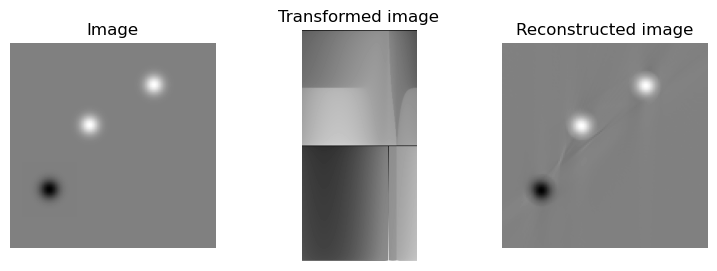

In [4]:
##  Example 1: 

#Generating a Sample image consists of positive and negative pixel values

Img = np.zeros([128,128])
x0=random.randint(40,80)
y0=random.randint(40,80)

Img[x0,y0] = 1
Img[x0+40,y0-25] = -1
Img[x0-25,y0+40] = 1

Img = gaussian_filter(Img, sigma=random.randint(3,6))
Img=np.asarray(Img,dtype=np.float64)
template=np.ones_like(Img)
x0_range = [0, 1]
x_range = [0, 1]
fig,(ax)=plt.subplots(ncols=3,dpi=100,figsize=(9,3))
im=ax[0].imshow(Img,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Image')
## RSCDT  Forward Transform
RSCDT=RadonSCDT()
RSCDT_img,ref,mpos_all,mneg_all,rad1=RSCDT.forward( x0_range, template, x_range, Img, rm_edge=False)
im=ax[1].imshow(RSCDT_img,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed image')

## Reconstruction: RSCDT Inverse Transform 
Irec,rdn=RSCDT.inverse( RSCDT_img,ref,mpos_all,mneg_all, template, x_range)
im=ax[2].imshow(Irec,cmap='gray')
ax[2].axis('off')
ax[2].set_title('Reconstructed image')


Text(0.5, 1.0, 'Reconstructed image')

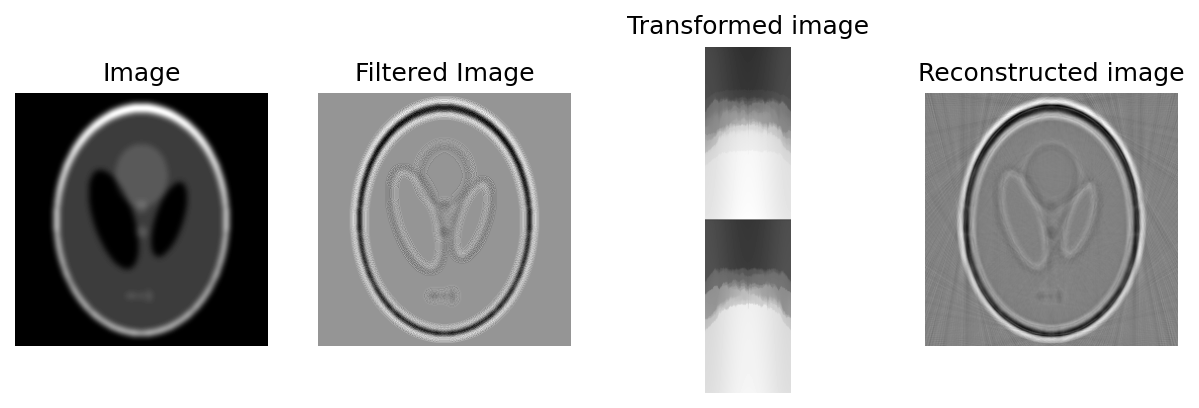

In [17]:
##  Example 2: 

from PIL import Image
import cv2
img = Image.open('images/phantom.png')
img = img.convert('L')
Img= cv2.Laplacian(np.asarray(img),cv2.CV_64F)

template=np.ones_like(Img)
x0_range = [0, 1]
x_range = [0, 1]
fig,(ax)=plt.subplots(ncols=4,dpi=150,figsize=(10,3))
im=ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Image')
im=ax[1].imshow(Img,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Filtered Image')

## RSCDT  Forward Transform
RSCDT=RadonSCDT()
RSCDT_img,ref,mpos_all,mneg_all,rad1=RSCDT.forward( x0_range, template, x_range, Img, rm_edge=False)
im=ax[2].imshow(RSCDT_img,cmap='gray')
ax[2].axis('off')
ax[2].set_title('Transformed image')

## Reconstruction: RSCDT Inverse Transform 
Irec,rdn=RSCDT.inverse( RSCDT_img,ref,mpos_all,mneg_all, template, x_range)
im=ax[3].imshow(Irec,cmap='gray')
ax[3].axis('off')
ax[3].set_title('Reconstructed image')